<a href="https://colab.research.google.com/github/tiachoi2001/ToBigs20/blob/main/Week2_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ToBigs_session/Week2/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


In [ ]:
y_train.head()

71     1
124    1
184    1
97     0
149    0
Name: Label, dtype: int64

이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [ ]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [ ]:
# parameter 개수
N = len(X_train.loc[0])

In [ ]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.24960629, 0.43741798, 0.42506074])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [ ]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1+e^{-X_i\theta}}$

In [ ]:
import math
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))
    return p

In [ ]:
logistic(X_train.iloc[1], parameters)

0.6871612830264914

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma[y_ilog(p_i) + (1-y_i)log(1-p_i)] $

In [ ]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = - (y * np.log(p) + (1 - y) * np.log(1 - p))
    return loss

In [ ]:
def mse_i(X, y, parameters):
    y_hat = dot_product(parameters, X)
    loss = (y - y_hat) ** 2
    return loss

In [ ]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [ ]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.9573723731736172

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\Sigma(y_i-\theta^TX_{ij})\cdot X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)= \Sigma (p(x_i) - y_i) x_{ij}$

In [ ]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = -(y - y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = (p - y) * X[j]
    return gradient

In [ ]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

-0.21686477879967975

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [ ]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]

    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)

    return gradients

In [ ]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[40.843788639786425, 7.007203986097876, 38.652424497627905]

## mini-batch
인덱스로 미니 배치 나누기

In [ ]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 이 함수는 주어진 훈련 데이터 X_train의 인덱스의 배치를 생하는 함수입니다. batch_size는 각 배치에 들어갈 데이터의 수입니다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [ ]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= (learning_rate / n)

    parameters -= gradients
    return parameters

In [ ]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.24688337, 0.43695083, 0.42248391])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 전체 데이터셋을 이용해 한번 학습하는 과
- num_epoch:전체 데이터셋을 이용해 학습한 횟수
<br>

BGD: 학습 한 번에 모든 데이터셋을 이용해 기울기를 업데이트
SGD: 학습 한 번에 1개의 데이터를 이용해 기울기를 업데이트
MGD: 학습 한 번에 데이터셋의 일부만 사용해 기울기 업데이트
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> MGD  
batch_size=k -> SGD  
batch_size=whole -> BGD

In [ ]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)

    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))

            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss

        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")

    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [ ]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.9697699171291153  params: [0.81380117 0.72379685 0.22856199]  gradients: [0.03898229888365313, 0.005439264727064483, 0.024277381187291242]
epoch: 100  loss: 0.43915096197608733  params: [-0.79160381  1.00503304 -0.9161005 ]  gradients: [0.004764234546635534, -0.005469627491827504, 0.0059328873414396755]
epoch: 200  loss: 0.38459473581970494  params: [-1.04545144  1.48820025 -1.40238237]  gradients: [0.001429744412811789, -0.004179574649663625, 0.0040863776302493245]
epoch: 300  loss: 0.3573646676193632  params: [-1.15482261  1.85290473 -1.75717471]  gradients: [0.0008868375440361736, -0.003194711640632166, 0.003095590671248246]
epoch: 400  loss: 0.34104978311844303  params: [-1.23308058  2.13741168 -2.03203512]  gradients: [0.0007014909150037782, -0.002544089391288249, 0.002450485054761814]
epoch: 500  loss: 0.3304159371133109  params: [-1.29726217  2.36769601 -2.25327898]  gradients: [0.0005897609412194629, -0.002091297865507931, 0.0020040995007686753]
epoch: 600  lo

array([-1.50835556,  3.09143698, -2.94118569])

In [ ]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size = 1)
new_param_sgd

epoch: 0  loss: 0.27740887779246415  params: [-0.88200936  1.04635045 -1.17649281]  gradients: [0.02505899499792856, 0.01363712904600175, 0.017631276879093886]
epoch: 100  loss: 0.07736673361821006  params: [-1.93032548  4.1750189  -4.06769059]  gradients: [0.007538545207839112, 0.004102483512483965, 0.005304050614797791]
epoch: 200  loss: 0.07736266552320378  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.0075381595219625305, 0.004102273621861033, 0.00530377924978579]
epoch: 300  loss: 0.07736266518361752  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489767162, 0.004102273604340283, 0.0053037792271334264]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 0

array([-1.9303681 ,  4.17514311, -4.06780375])

In [ ]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 45)
new_param_mgd

epoch: 0  loss: 0.9682712504958431  params: [0.67835702 0.22680017 0.0344512 ]  gradients: [0.043439157084842694, 0.02416017744906374, 0.05441554338896403]
epoch: 100  loss: 0.2866450377384201  params: [-1.23140229  2.12587838 -2.06536958]  gradients: [0.0008222963732184589, -0.0012582413041538336, 0.0059883832295963505]
epoch: 200  loss: 0.2412203194155089  params: [-1.46775535  2.91239435 -2.79444241]  gradients: [0.0014653565958095871, -0.0013099320652941574, 0.003166174684712008]
epoch: 300  loss: 0.2221398813771276  params: [-1.61588674  3.3675163  -3.21265835]  gradients: [0.001950556388540923, -0.001261923356870158, 0.001998375876008128]
epoch: 400  loss: 0.2116457891327963  params: [-1.71730192  3.66957571 -3.48858807]  gradients: [0.0022921847736418273, -0.0012100958012178696, 0.0013585515858694638]
epoch: 500  loss: 0.20507982082125645  params: [-1.79042803  3.88386017 -3.6835316 ]  gradients: [0.0025378864272949703, -0.001166909311202597, 0.0009579073934914481]
epoch: 600  l

array([-1.96306732,  4.38096405, -4.13320433])

### Predict Label

In [ ]:
y_predict_b = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict_b.append(1)
    else :
        y_predict_b.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

In [ ]:
y_predict_s = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_sgd)
    if p> 0.5 :
        y_predict_s.append(1)
    else :
        y_predict_s.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

In [ ]:
y_predict_m = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd)
    if p> 0.5 :
        y_predict_m.append(1)
    else :
        y_predict_m.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [ ]:
from sklearn.metrics import *

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_b).ravel()
confusion_matrix(y_test, y_predict_b)

array([[38,  2],
       [ 4,  6]])

In [ ]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_s).ravel()
confusion_matrix(y_test, y_predict_s)

array([[38,  2],
       [ 1,  9]])

In [ ]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.94


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_m).ravel()
confusion_matrix(y_test, y_predict_s)

array([[38,  2],
       [ 1,  9]])

In [ ]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.92


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [ ]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [ ]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [ ]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.59706233, 2.31733932])

In [ ]:
#경사하강법
new_param = gradient_descent(X, y, model="linear")
new_param

epoch: 0  loss: 1.1183338238630225  params: [1.15900879 0.97355614]  gradients: [-0.01935063541593883, -0.034684218449398306]
epoch: 100  loss: 0.5677212000884143  params: [0.56462426 2.41868544]  gradients: [-0.002868376201799951, -0.01342288412466205]
epoch: 200  loss: 0.567478463521626  params: [0.56409763 2.41971102]  gradients: [-0.0028686685259719626, -0.013413921912766202]
epoch: 300  loss: 0.5674782837315878  params: [0.56409724 2.41971178]  gradients: [-0.0028686687425732863, -0.013413915272100873]
epoch: 400  loss: 0.5674782835983704  params: [0.56409724 2.41971179]  gradients: [-0.002868668742733756, -0.013413915267180386]
epoch: 500  loss: 0.5674782835982729  params: [0.56409724 2.41971179]  gradients: [-0.002868668742733917, -0.013413915267176807]
epoch: 600  loss: 0.5674782835982729  params: [0.56409724 2.41971179]  gradients: [-0.002868668742733917, -0.013413915267176807]
epoch: 700  loss: 0.5674782835982729  params: [0.56409724 2.41971179]  gradients: [-0.00286866874273

array([0.56409724, 2.41971179])

In [ ]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

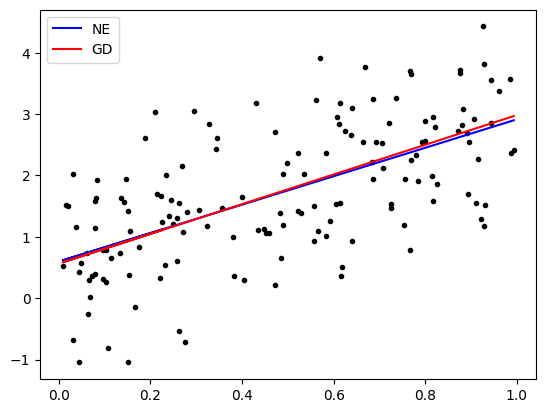

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()